<a href="https://colab.research.google.com/github/Lorena-GuevaraC/Regresion-Lineal/blob/main/Tarea_Regresi%C3%B3n_y_clasificaci%C3%B3n_Punto_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regresión y clasificación**

### *Lorena Guevara Cortina*

Datos: [Boston Housing](https://www.kaggle.com/c/boston-housing)


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.datasets import load_boston

datos = load_boston()
Boston = pd.DataFrame(datos.data, columns = datos.feature_names)

**INFORMACIÓN COLUMNAS**

CRIM: tasa de criminalidad per cápita

ZN: proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

INDUS: proporción de negocios no minoristas.

CHAS : Charles River variable dummy (1 si el tramo limita con el río; 0 otro caso)

NOX: concentración de óxidos nítricos (10 ppm)

RM: número medio de habitaciones por vivienda.

AGE:  proporción de viviendas ocupadas por sus propietarios construidas antes de 1940

DIS: Distancia promedio a cinco centros de empleo 

RAD: Índice de accesibilidad a carreteras radiales

TAX: tasa del impuesto sobre el valor total de la propiedad por cada $10,000.

PTRATIO: Proporción alumno-profesor por ciudad

B: $1000(Bk — 0.63)^2$, donde Bk is the proportion de personas de ascendencia afroamericana por ciudad

LSTAT: Porcentaje de menor estatus de la población

MEDV: Valor medio de las viviendas ocupadas por sus propietarios en $1000s

In [ ]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## los datos cargados no tienen la columna MEDV que es la que se quiere predecir, la generamos con .target

In [ ]:
Boston['MEDV'] = datos.target

In [ ]:
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Ver si tiene valores null
Boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# ver si tiene valores na
Boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# dividimos los datos entre las entradas y las salidas
X = Boston.iloc[:, 0:13].values
y = Boston.iloc[:, 13].values.reshape(-1,1)

In [ ]:
# separamos la informacion en train - test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [ ]:
X_train.shape[1]

13

In [ ]:
#Normalizar los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
model = keras.Sequential([
                          layers.Dense(20, activation = 'relu', input_shape = (X_train.shape[1],)),
                          layers.Dense(6, activation = 'relu' ),
                          layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error', 
                optimizer= 'adam',
                metrics=['mae', 'mse'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 126       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

epochs = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  X_train, y_train,
  epochs=epochs, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,18.539408,3.107225,18.539408,16.061594,3.138157,16.061594,95
96,18.434776,3.095952,18.434776,15.977313,3.130833,15.977313,96
97,18.337147,3.076058,18.337147,15.745295,3.102767,15.745295,97
98,18.240791,3.057562,18.240791,15.649108,3.095490,15.649108,98
99,18.127455,3.053302,18.127455,15.666046,3.114016,15.666046,99


In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

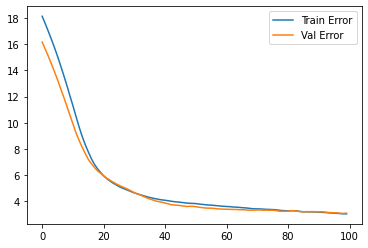

In [ ]:
plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
plt.legend()

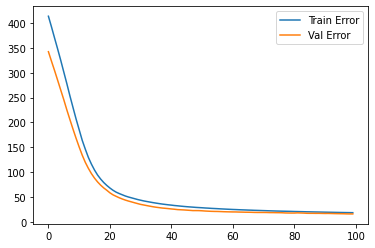

In [ ]:
plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
plt.legend()

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

4/4 - 0s - loss: 19.0016 - mae: 2.8200 - mse: 19.0016
Testing set Mean Abs Error:  2.82 


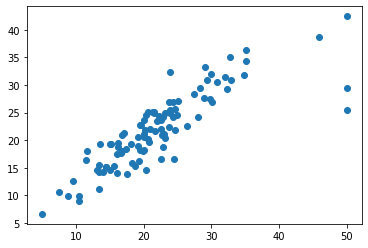

In [ ]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)


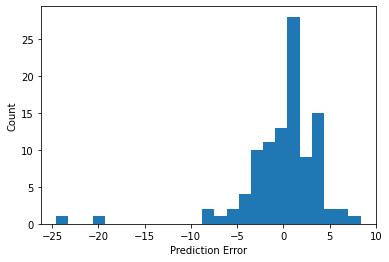

In [ ]:
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")